Цель:

провести отбор признаков Деревом решений и построить на его основе ансамблевые классификаторы.

План:

1) Используя метод отбора на основе важности признаков класса ExtraTreesClassifier, определить и оставить в наборе наиболее важные признаки.

2) Создать и обучить классификатор на основе деревьев решений.

2.а) Определить точность классификации.

2.б) Визуализировать границу принятия решений и построенное дерево решений.

3) Построить на основе классификатора деревьев решений ансамблевые классификаторы:

* BaggingClassifier,

* RandomForestClassifier,

* AdaBoostClassifier,

* GradientBoostingClassifier.

3.а) Увеличить точность классификации.

3.б) Построить границы принятия решений классификаторов.

4) Определить лучший ансамблевый классификатор, дающий наиболее высокую точность классификации.

Источник данных: http://archive.ics.uci.edu/ml/datasets/Forest+Fires, файл "forestfires.csv".

Считаем набор данных из репозитария UCI.

In [2]:
import pandas as pd
import numpy as np

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

# Считываем данные в объект DataFrame
data = pd.read_csv(url, sep = ',')

target = data['month'] # Будем прогнозировать месяц

In [4]:
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [5]:
data = data.replace('?', np.NaN) # Заменим '?' на np.NaN

for col in data.columns:
    print('\t%s: %d' % (col, data[col].isna().sum()))

	X: 0
	Y: 0
	month: 0
	day: 0
	FFMC: 0
	DMC: 0
	DC: 0
	ISI: 0
	temp: 0
	RH: 0
	wind: 0
	rain: 0
	area: 0


Пропущенных значений нет.

In [6]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Все числовые признаки распознаны в наборе верно. Преобразуем категориальные признаки в числовые при помощи кодирования меток (label encoding).

In [7]:
data["month"] = data["month"].astype('category')
data["day"] = data["day"].astype('category')

data["month"] = data["month"].cat.codes
data["day"] = data["day"].cat.codes

target = data['month'] # Обновим, т. к. изменили тип

In [8]:
data.dtypes

X          int64
Y          int64
month       int8
day         int8
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Используя метод отбора на основе важности признаков класса ExtraTreesClassifier, определим и оставим в наборе наиболее важные признаки.

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
data = data.drop(['month'], axis = 1)

et_clf = ExtraTreesClassifier()
et_clf.fit(data, target);

In [11]:
# Посмотрим важности признаков
et_clf.feature_importances_

array([0.04052613, 0.03982329, 0.04704805, 0.07973238, 0.18800123,
       0.31834537, 0.08232168, 0.07483025, 0.05048371, 0.04714473,
       0.00230194, 0.02944126])

In [12]:
# Удалим признаки, важность которых меньше 0.04
data = data.drop(data.columns[et_clf.feature_importances_ < 0.04], axis = 1)
data

,X,day,FFMC,DMC,DC,ISI,temp,RH,wind
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7
1,7,5,90.6,35.4,669.1,6.7,18.0,33,0.9
2,7,2,90.6,43.7,686.9,6.7,14.6,33,1.3
3,8,0,91.7,33.3,77.5,9.0,8.3,97,4.0
4,8,3,89.3,51.3,102.2,9.6,11.4,99,1.8
...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7
513,2,3,81.6,56.7,665.6,1.9,21.9,71,5.8
514,7,3,81.6,56.7,665.6,1.9,21.2,70,6.7
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0


Разобьем набор данных на обучающую и тестовую выборки.

In [13]:
from sklearn.model_selection import train_test_split

X = data.to_numpy()
y = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Создадим классификатор.

In [14]:
import matplotlib.pyplot as plt

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth = 5)  
dt_clf.fit(X_train, y_train);

In [18]:
dt_clf.score(X_test, y_test) # Точность классификации

0.8974358974358975

Для визуализации границы принятия решений будем использовать два признака с наиболее высокой оценкой важности.

In [19]:
dt_clf.feature_importances_

array([0.        , 0.        , 0.07813722, 0.35403156, 0.53211208,
       0.0081171 , 0.02760204, 0.        , 0.        ])

In [20]:
X = data.iloc[:, 2:4].to_numpy()

Масштабируем признаки набора на интервал от 0 до 1 для удобства построения графика.

In [21]:
from sklearn.preprocessing import MinMaxScaler

np.set_printoptions(precision = 3)

scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

dt_clf2 = DecisionTreeClassifier(max_depth = 5)
dt_clf2.fit(X_train, y_train)
dt_clf2.score(X_test, y_test)

0.6987179487179487

Визуализируем набор на плоскости.

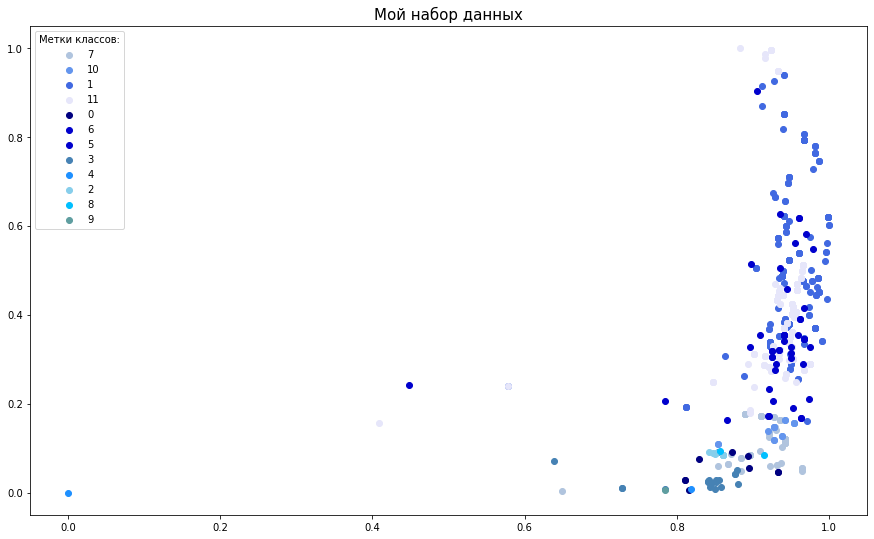

In [23]:
plt.figure(figsize = (15, 9))

colors = ['#B0C4DE', '#6495ED', '#4169E1', '#E6E6FA', '#000080', '#0000CD',
         '#0000CD', '#4682B4', '#1E90FF', '#87CEEB', '#00BFFF', '#5F9EA0']

for c, i in zip(colors, target.unique()):
    plt.scatter(X[y==i,0], X[y==i,1], color = c, label = i)
plt.title('Мой набор данных', fontsize = 15)
plt.legend(title = 'Метки классов:')
plt.show()

Визуализируем границу принятия решений и построенное дерево решений.

In [24]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#DDA0DD','#580F41','#800080','#7E1E9C','#EE82EE','#9A0EEA',
                                 '#DA70D6','#C79FEF','#FF81C0','#C20078','#FF00FF','#ED0DD9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

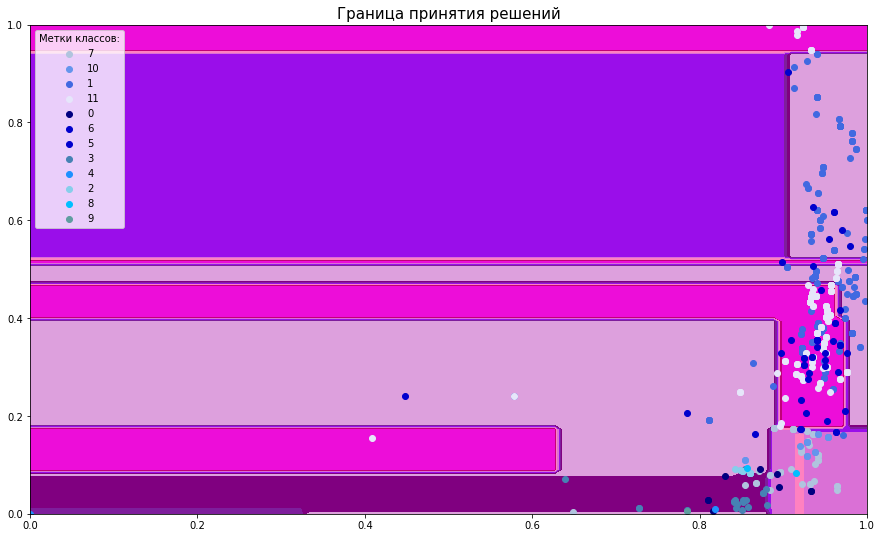

In [25]:
plt.figure(figsize = (15, 9))
plot_decision_boundary(dt_clf2, axis = [0, 1, 0, 1])
for c, i in zip(colors, target.unique()):
    plt.scatter(X[y==i,0], X[y==i,1], color = c, label = i)
plt.title('Граница принятия решений', fontsize = 15)
plt.legend(title = 'Метки классов:')
plt.show()

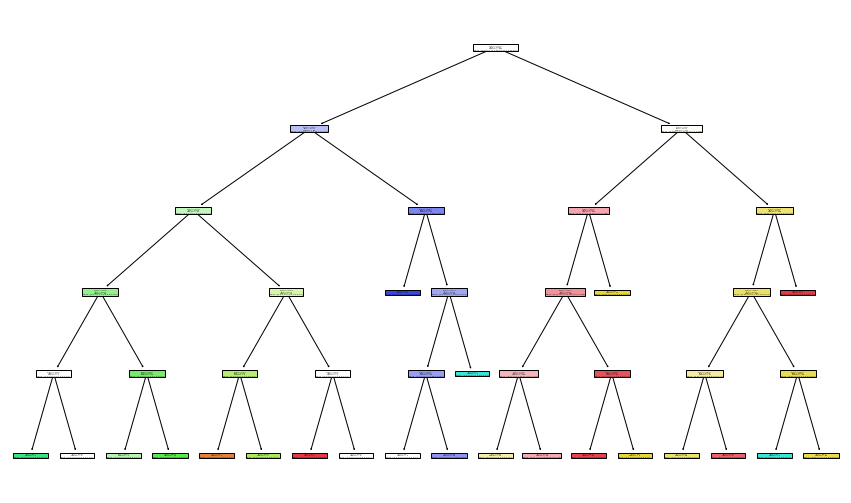

In [27]:
plt.figure(figsize = (15, 9))
plot_tree(dt_clf2, filled = True);

Построим на основе классификатора деревьев решений ансамблевые классификаторы.

In [36]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(max_depth = 5),
                           n_estimators = 5000, max_samples = 100,
                           bootstrap = True)
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.7307692307692307

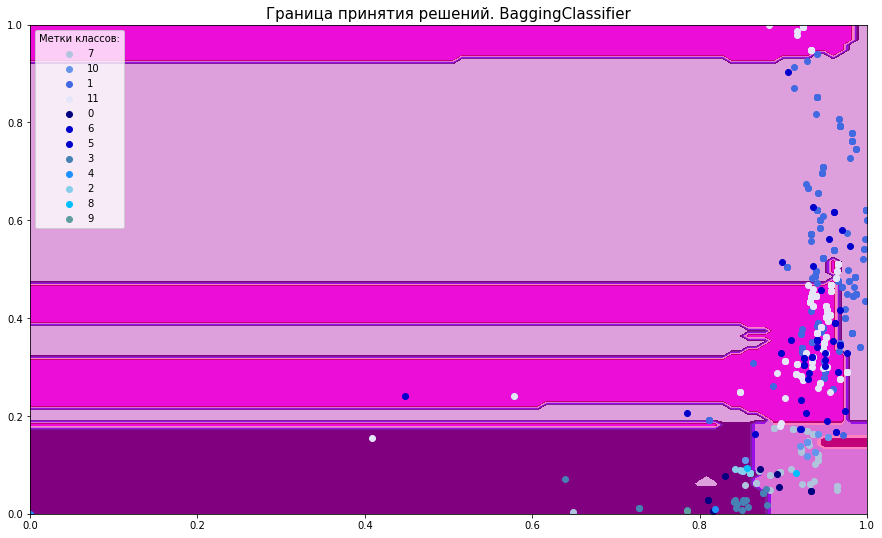

In [37]:
plt.figure(figsize = (15, 9))
plot_decision_boundary(bagging_clf, axis = [0, 1, 0, 1])
for c, i in zip(colors, target.unique()):
    plt.scatter(X[y==i,0], X[y==i,1], color = c, label = i)
plt.title('Граница принятия решений. BaggingClassifier', fontsize = 15)
plt.legend(title = 'Метки классов:')
plt.show()

In [38]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 5000, 
                                max_leaf_nodes = 16, n_jobs = -1)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7628205128205128

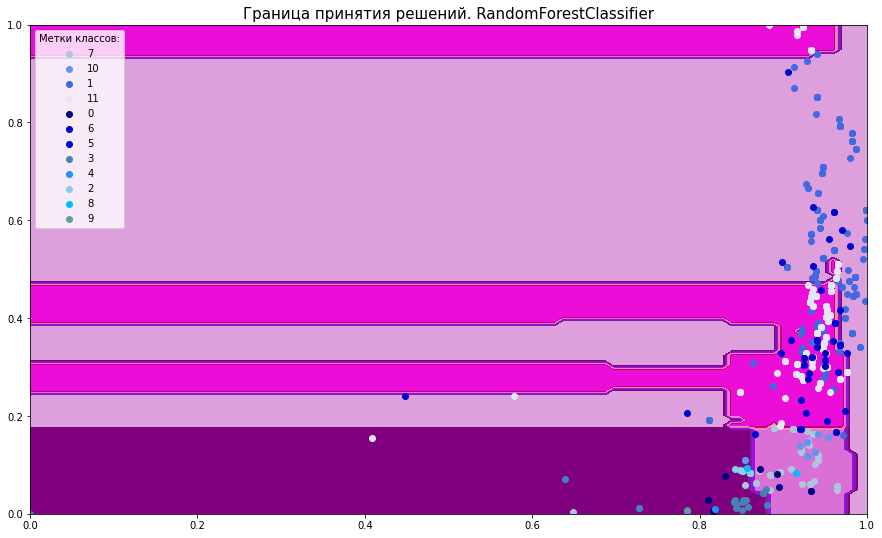

In [39]:
plt.figure(figsize = (15, 9))
plot_decision_boundary(rf_clf, axis = [0, 1, 0, 1])
for c, i in zip(colors, target.unique()):
    plt.scatter(X[y==i,0], X[y==i,1], color = c, label = i)
plt.title('Граница принятия решений. RandomForestClassifier', fontsize = 15)
plt.legend(title = 'Метки классов:')
plt.show()

In [40]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5), 
                             n_estimators = 5000)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.8717948717948718

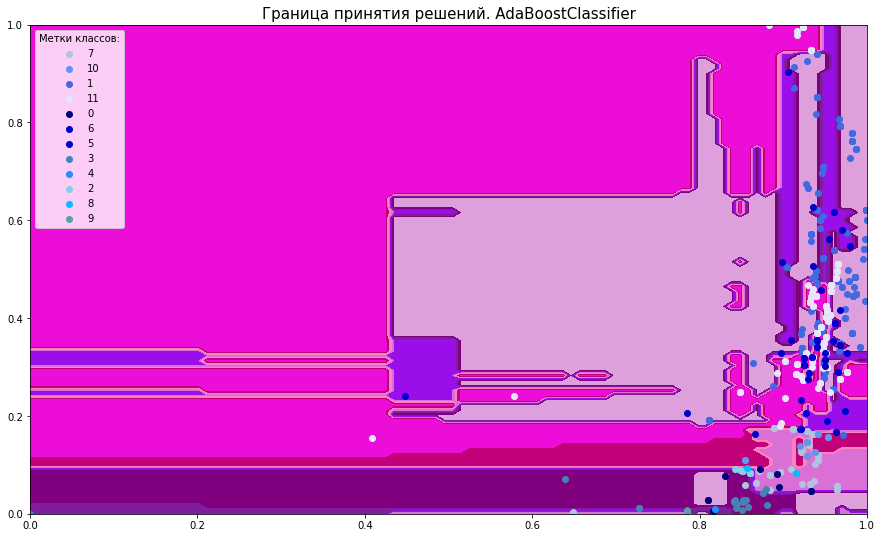

In [41]:
plt.figure(figsize = (15, 9))
plot_decision_boundary(ada_clf, axis = [0, 1, 0, 1])
for c, i in zip(colors, target.unique()):
    plt.scatter(X[y==i,0], X[y==i,1], color = c, label = i)
plt.title('Граница принятия решений. AdaBoostClassifier', fontsize = 15)
plt.legend(title = 'Метки классов:')
plt.show()

In [42]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth = 5, n_estimators = 5000)
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.8910256410256411

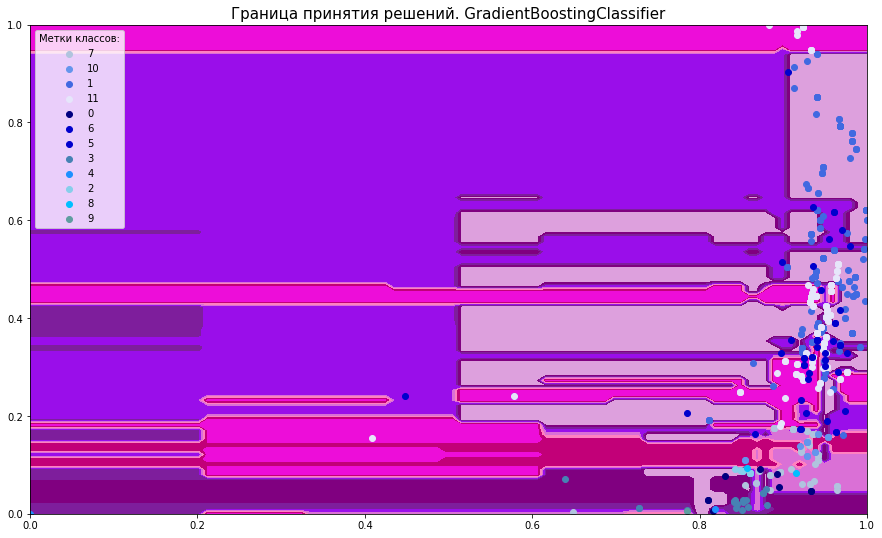

In [43]:
plt.figure(figsize = (15, 9))
plot_decision_boundary(gb_clf, axis = [0, 1, 0, 1])
for c, i in zip(colors, target.unique()):
    plt.scatter(X[y==i,0], X[y==i,1], color = c, label = i)
plt.title('Граница принятия решений. GradientBoostingClassifier', fontsize = 15)
plt.legend(title = 'Метки классов:')
plt.show()

Определим лучший ансамблевый классификатор, дающий наиболее высокую точность классификации.

In [44]:
cls = {0: 'BaggingClassifier', 1: 'RandomForestClassifier', 
       2: 'AdaBoostClassifier', 3: 'GradientBoostingClassifier'}

accuracy = np.array([bagging_clf.score(X_test, y_test), rf_clf.score(X_test, y_test), 
                    ada_clf.score(X_test, y_test), gb_clf.score(X_test, y_test)])

best = cls.get(np.argmax(accuracy))
best

'GradientBoostingClassifier'